# Market Research For Small Robot-Run Cafe

The objective of this project is to conduct market research for a small robot-run cafe in Los Angeles. Investors would like to know the current market conditions.

# Table of Contents

- [Data Description](#description)<br>
- [Data Inspection](#inspection)<br>
- [Data Analysis](#analysis)<br>
- [Conclusion](#conclusion)

## Data Description
<div id='description'></div>



rest_data table:

- object_name - establishment name
- chain - chain establishment (TRUE/FALSE)
- object_type - establishment type
- address - address
- number - number of seats

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
#importing data 
try: 
    rest = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/HowToTellAStoryUsingData/rest_data_us.csv')
except:
    rest = pd.read_csv('/datasets/rest_data_us.csv')

## Data Inspection
<div id='inspection'></div>

In [3]:
#inspecting rest table
rest.info()
print(f'Missing values in rest table {rest.isna().sum()}')
print(f'Duplicated values in rest table {rest.duplicated().sum()}')
rest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
Missing values in rest table id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64
Duplicated values in rest table 0


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [4]:
#finding missing value records
rest[rest['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Comment:

There are 3 nan values in the chain column. These values can be removed as they make up less than 0.001% of the data set therefore having no significant impact on the data.

In [5]:
#removing nan values in chains column
rest.dropna(inplace=True)

In [6]:
#investigating missing values
print(f'Missing values in rest table {rest.isna().sum()}')

Missing values in rest table id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64


In [7]:
#changing chain column type to boolean 
rest['chain'] = rest['chain'].astype(bool)

In [8]:
#checking data set after changes
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   int64 
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   bool  
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 461.7+ KB


## Data analysis
<div id='analysis'></div>

Investigating the proportions of the various types of establishments.

In [9]:
#Grouping rest table
types = rest.groupby('object_type').agg({'id':'count'}).sort_values(by='id',ascending=False).reset_index()
types

,object_type,id
0,Restaurant,7253
1,Fast Food,1066
2,Cafe,435
3,Pizza,319
4,Bar,292
5,Bakery,283


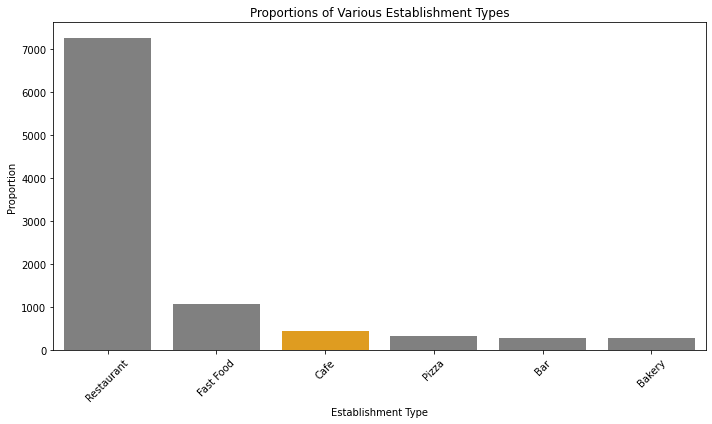

In [10]:
#Plotting the graph
plt.figure(figsize=(10,6))
color_list = ['orange' if r_type == 'Cafe' else 'grey' for r_type in types['object_type']]
sns.barplot(data=types,x='object_type',y='id',palette=color_list)
plt.title('Proportions of Various Establishment Types')
plt.xlabel('Establishment Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Investigating the proportions of the chain and nonchain of establishments.

In [11]:
#
chains = rest.groupby('chain').agg({'id':'count'}).reset_index()
chains

,chain,id
0,False,5972
1,True,3676


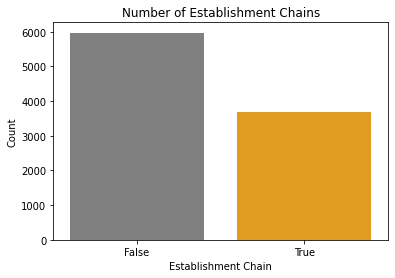

In [12]:
#
plt.title('Number of Establishment Chains')
sns.barplot(data=chains,x='chain',y='id',palette=['grey','orange'])
plt.xlabel('Establishment Chain')
plt.ylabel('Count')
plt.show()

Which type of establishment is typically a chain?

In [13]:
typical = rest.groupby(['chain','object_type']).agg({'id':'count'}).reset_index()
typical

,chain,object_type,id
0,False,Bar,215
1,False,Cafe,169
2,False,Fast Food,461
3,False,Pizza,166
4,False,Restaurant,4961
5,True,Bakery,283
6,True,Bar,77
7,True,Cafe,266
8,True,Fast Food,605
9,True,Pizza,153


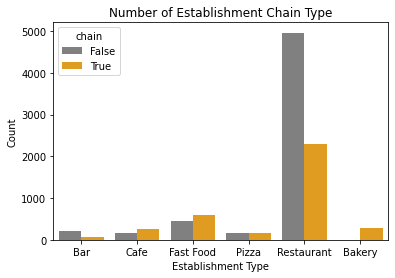

In [14]:
plt.title('Number of Establishment Chain Type')
sns.barplot(data=typical,x='object_type',y='id',hue='chain',palette=['grey','orange'])
plt.xlabel('Establishment Type')
plt.ylabel('Count')
plt.show()

Comment: Typically restaurants and fast food establishment types are chains.

Investigating what characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats? 

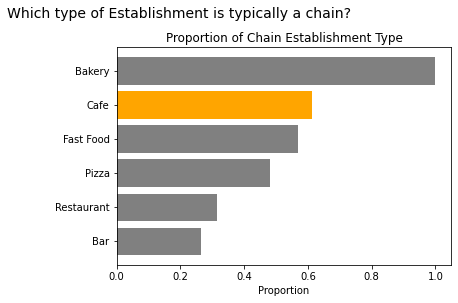

In [15]:
chain_est = rest.pivot_table(index="object_type", columns="chain", values="id", aggfunc="count").reset_index().fillna(0)
chain_est['chain_ratio'] = chain_est[True]/(chain_est[True] + chain_est[False])
chain_est.sort_values(by="chain_ratio", na_position='first', inplace=True)


plt.barh(
    y="object_type",
    width="chain_ratio",
    data=chain_est,
    color=["orange" if color == "Cafe" else "gray" for color in chain_est["object_type"].unique()]
)
plt.xlabel("Proportion")
plt.title("Proportion of Chain Establishment Type")
plt.suptitle("Which type of Establishment is typically a chain?", x=0.27, y=1.02, va="top", fontsize=14)
plt.show()

In [16]:
seats = rest[rest['object_type']=='Restaurant']
seats

,id,object_name,address,chain,object_type,number
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY 126,False,Restaurant,100
...,...,...,...,...,...,...
9643,21429,DIVINE DIPS,601 S LOS ANGELES ST,False,Restaurant,25
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD 1025,False,Restaurant,225
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93


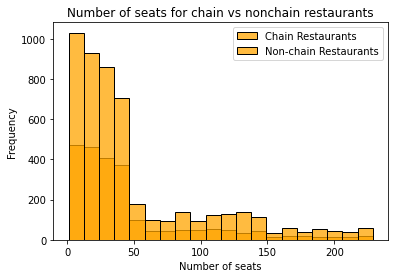

In [17]:
plt.title('Number of seats for chain vs nonchain restaurants')
sns.histplot(data=seats[seats['chain']==True],x='number',bins=20,label='Chain Restaurants',color='orange')
sns.histplot(data=seats[seats['chain']==False],x='number',bins=20,label='Non-chain Restaurants',color='orange')
plt.xlabel('Number of seats')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Determining the average number of seats for each type of restaurant. 

In [19]:
avg_seats = rest.groupby('object_type').agg({'number':'mean'}).sort_values(by='number',ascending=False).round().reset_index()
avg_seats

,object_type,number
0,Restaurant,48.0
1,Bar,45.0
2,Fast Food,32.0
3,Pizza,29.0
4,Cafe,25.0
5,Bakery,22.0


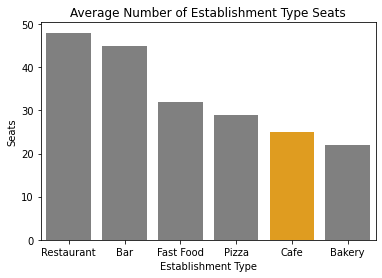

In [20]:
plt.title('Average Number of Establishment Type Seats')
color_list = ['orange' if r_type == 'Cafe' else 'grey' for r_type in avg_seats['object_type']]
sns.barplot(data=avg_seats,x='object_type',y='number',palette=color_list)
plt.xlabel('Establishment Type')
plt.ylabel('Seats')
plt.show()

Putting the data on street names from the address column in a separate column. 

In [21]:
def remove_numbers(row):
    return re.sub(r'\d+', '', row)

# Extract street name from address and create new 'street' column
rest['street'] = rest['address'].apply(remove_numbers)

In [22]:
street = rest[rest['object_type']=='Restaurant'].groupby('street').agg({'id':'count'}).reset_index().sort_values(by='id',ascending=False).head(10)
street

,street,id
1422,W TH ST,239
1343,W PICO BLVD,218
1390,W SUNSET BLVD,217
358,HOLLYWOOD BLVD,136
1531,WILSHIRE BLVD,131
1357,W RD ST,121
1045,S VERMONT AVE,107
1122,SANTA MONICA BLVD,107
1325,W OLYMPIC BLVD,107
459,MELROSE AVE,106


Plotting a graph of the top ten streets by number of restaurants. 

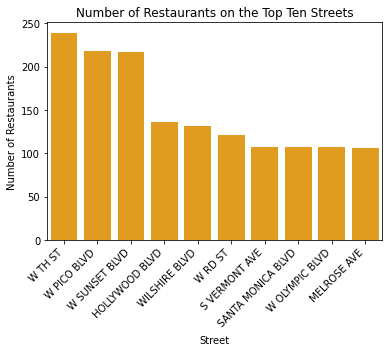

In [23]:
plt.title('Number of Restaurants on the Top Ten Streets')
fig = sns.barplot(data=street,x='street',y='id',color='orange')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Street')
plt.ylabel('Number of Restaurants')
plt.show()

Finding the number of streets that only have one restaurant.

In [24]:
one = rest[rest['object_type']=='Restaurant'].groupby('street').agg({'id':'count'}).reset_index()
one = one[one['id']==1]['street'].count()
print(f'There are {one} streets that have one restaurant')

There are 1040 streets that have one restaurant


Looking at the distribution of the number of seats of the top ten streets with the most restaurants

In [25]:
seatsdis = rest[rest['street'].isin(street['street'])].groupby('street').agg({'id':'count','number':'median'}).reset_index().sort_values(by='number',ascending=False).head(10)
seatsdis

,street,id,number
9,WILSHIRE BLVD,161,40.0
1,MELROSE AVE,128,38.5
0,HOLLYWOOD BLVD,167,36.0
7,W SUNSET BLVD,296,35.0
4,W OLYMPIC BLVD,124,31.5
6,W RD ST,147,31.0
8,W TH ST,323,28.0
2,S VERMONT AVE,148,27.0
5,W PICO BLVD,288,27.0
3,SANTA MONICA BLVD,146,24.0


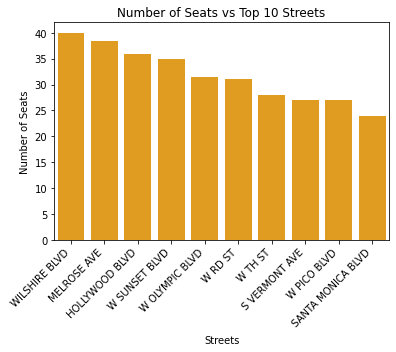

In [26]:
plt.title('Number of Seats vs Top 10 Streets')
fig = sns.barplot(data=seatsdis,x='street',y='number',color='orange')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Streets')
plt.ylabel('Number of Seats')
plt.show()

Comment:

Taking the the top 10 streets and aranging the median restaurants in descending order the observed trend is a linear decline.

# Conclusion 
<div id='conclusion'></div>

Cafe's are the third most popular establishment types to be opened. Most estabilshments are not franchises, however most cafe's are franchises. So chains are market threats for Cafe estabilshments in Los Angeles. It is observed that a number of restaurants with less than 50 seats is the trend in the industry. This can imply that chances of profitability is increased when more establishments are opened. Cafe's have an average of 25 seats in Los Angeles. Most estabilshments are opened in W TH Street, W Pico boulevard and W Sunset boulevard. Out of a dataset of 9846 records 1040 streets have one establishment. The observed trend on streets is that the median seats of restaurants forms a declining linear trend. 

Presentation: https://drive.google.com/file/d/18AYbYtdkTzNHwlm08HAV3jaenn6EHT9g/view?usp=sharing